In [20]:
#importing required libraries
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score,f1_score,precision_score,recall_score,jaccard_score
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")

In [2]:
#data set is from kaggle https://www.kaggle.com/datasets/sujithmandala/credit-score-classification-dataset
df = pd.read_csv("E:\data sets\Credit Score Classification Dataset.csv")
df.head()

,Age,Gender,Income,Education,Marital Status,Number of Children,Home Ownership,Credit Score
0,25,Female,50000,Bachelor's Degree,Single,0,Rented,High
1,30,Male,100000,Master's Degree,Married,2,Owned,High
2,35,Female,75000,Doctorate,Married,1,Owned,High
3,40,Male,125000,High School Diploma,Single,0,Owned,High
4,45,Female,100000,Bachelor's Degree,Married,3,Owned,High


In [3]:
df.shape

(164, 8)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 164 entries, 0 to 163
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 164 non-null    int64 
 1   Gender              164 non-null    object
 2   Income              164 non-null    int64 
 3   Education           164 non-null    object
 4   Marital Status      164 non-null    object
 5   Number of Children  164 non-null    int64 
 6   Home Ownership      164 non-null    object
 7   Credit Score        164 non-null    object
dtypes: int64(3), object(5)
memory usage: 10.4+ KB


In [5]:
df.isnull().sum()

Age                   0
Gender                0
Income                0
Education             0
Marital Status        0
Number of Children    0
Home Ownership        0
Credit Score          0
dtype: int64

# EDA

In [6]:
df.describe()

,Age,Income,Number of Children
count,164.000000,164.000000,164.000000
mean,37.975610,83765.243902,0.652439
std,8.477289,32457.306728,0.883346
min,25.000000,25000.000000,0.000000
25%,30.750000,57500.000000,0.000000
50%,37.000000,83750.000000,0.000000
75%,45.000000,105000.000000,1.000000
max,53.000000,162500.000000,3.000000


<AxesSubplot:xlabel='Age', ylabel='Count'>

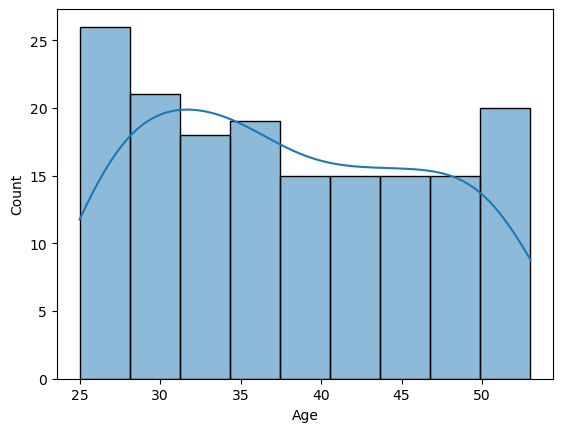

In [29]:
sns.histplot(data=df, x='Age', kde=True)


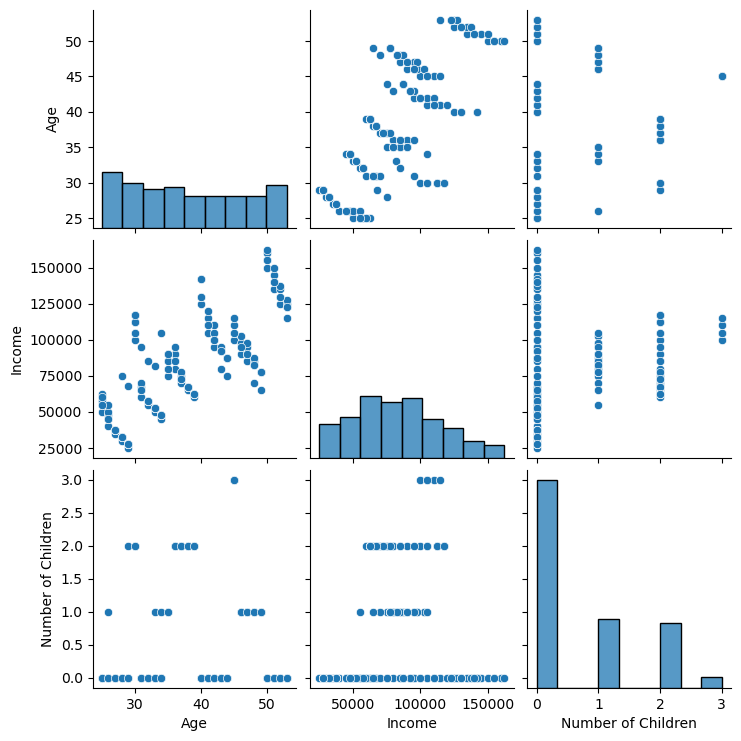

In [30]:
sns.pairplot(df)

# Label encoding for object data types

In [10]:
#loop over each column in the dataframe where datatype is object 
for col in df.select_dtypes(include=['object']).columns:
    #print columns with unique values
    print(f'{col}:{df[col].unique()}')

Gender:['Female' 'Male']
Education:["Bachelor's Degree" "Master's Degree" 'Doctorate' 'High School Diploma'
 "Associate's Degree"]
Marital Status:['Single' 'Married']
Home Ownership:['Rented' 'Owned']
Credit Score:['High' 'Average' 'Low']


In [11]:
from sklearn import preprocessing
#loop over each column in the dataframe where datatype is object 
for col in df.select_dtypes(include=['object']).columns:
    
    #initize label encoder
    label_encoder=preprocessing.LabelEncoder()
    
    #fit the encoder with unique values in columns
    label_encoder.fit(df[col].unique())
    
    #transform the column
    df[col]=label_encoder.transform(df[col])
    
    #print columns with unique values
    print(f'{col}:{df[col].unique()}')
     

Gender:[0 1]
Education:[1 4 2 3 0]
Marital Status:[1 0]
Home Ownership:[1 0]
Credit Score:[1 0 2]


# Corelation heatmap of all features

<AxesSubplot:>

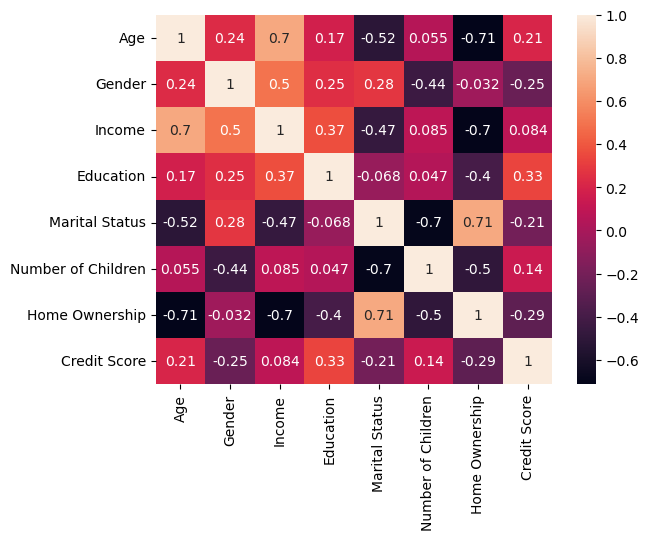

In [12]:
sns.heatmap(df.corr(),annot=True)

In [35]:
df.head()

,Age,Gender,Income,Education,Marital Status,Number of Children,Home Ownership,Credit Score
0,25,0,50000,1,1,0,1,1
1,30,1,100000,4,0,2,0,1
2,35,0,75000,2,0,1,0,1
3,40,1,125000,3,1,0,0,1
4,45,0,100000,1,0,3,0,1


# Train test split

In [36]:
X = df.drop('Credit Score',axis=1)
y = df['Credit Score']

In [44]:
#spliting data into train size 70% test size 30%
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.3,random_state=0)

# Random Forest algorithm  

In [63]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

rfc = RandomForestClassifier(class_weight='balanced')

param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 5, 10],  # Corrected line
    'max_features': ['sqrt', 'log2', None],
    'random_state': [0, 42]
}

# Perform a grid search with cross-validation to find the best hyperparameters
grid_search = GridSearchCV(rfc, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters
print(grid_search.best_params_)


{'max_depth': None, 'max_features': None, 'n_estimators': 100, 'random_state': 0}


In [61]:
rfc = RandomForestClassifier(random_state=0,n_estimators=100,class_weight='balanced')
rfc.fit(X_train,y_train)
y_pred = rfc.predict(X_test)

In [67]:
from sklearn.metrics import classification_report, confusion_matrix

# Calculate accuracy
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:", round(accuracy,2))

# Calculate precision, recall, and F1-score
precision = metrics.precision_score(y_test, y_pred, average='weighted')
recall = metrics.recall_score(y_test, y_pred, average='weighted')
f1_score = metrics.f1_score(y_test, y_pred, average='weighted')
jaccard = jaccard_score(y_test, y_pred,average='weighted')

print("Precision:", round(precision,2))
print("Recall:", round(recall,2))
print("F1-score:", round(f1_score,2))
print("Jaccard Score:",jaccard)

Accuracy: 0.96
Precision: 0.96
Recall: 0.96
F1-score: 0.96
Jaccard Score: 0.9243859649122809
